<center id='top'><h1>Project VII<br><br>Making Business Decisions Based on Data</h1></center>

<hr><h3>Description:</h3>

You are an analyst in a large online store and together with the company's marketing department you have decided on a step that includes a number of hypotheses tests that should help to give a better picture how to bring the store into it's maximize profits

As part of your role in the force you were asked to prepare a list of hypothesis tests and rate their importance including performing an A / B test that you had to analyze its results

<hr> <h3>Our To Do list:</h3><br>

<b>Part I "Prioritizing Hypotheses</b>

to check our list and prioritizing it we will use ICE and RICE , our list include 9 9 hypotheses , that can bring our Online Store to better , bigger revenue.

<br><b>Part II "A/B Test Analysis"</b>

for the secand part we have to "orders_us & visits_us" to do our test <br><br>
<hr>

<h2><u>Index:</u></h2><br> 
<a href="#1">Download the data and prepare it for analysis</a>
<p><b><u><a href="#2" style="color:darkgreen;">Part I "Prioritizing Hypotheses</a></u></b></p>
<ol>    
<li><a href="#p1">Apply the ICE framework to prioritize hypotheses</a></li> <br>
<li><a href="#p2">Apply the RICE framework to prioritize hypotheses</a></li> 
<br>
<li><a href="#p3">Show how the prioritization of hypotheses changes when you use RICE instead of ICE</a></li></ol>

<p><b><u><a href="#P2" style="color:darkgreen;">Part II - Analyze the A/B test</a></u></b></p>
<ol>    
<li><a href="#q1">Graph cumulative revenue by group</a></li> 
<br>    
<li><a href="#q2">Graph cumulative average order size by group</a></li> 
<br>    
<li><a href="#q3">Graph the relative difference in cumulative average order size for group B compared with group A</a></li> 
<br>    
<li><a href="#q4">Calculate each group's conversion rate as the ratio of orders to the number of visits for each day</a></li> 
<br>    
<li><a href="#q5">Plot a scatter chart of the number of orders per user</a></li> 
<br>    
<li><a href="#q6">Calculate the 95th and 99th percentiles for the number of orders per user</a></li> 
<br>    
<li><a href="#q7">Plot a scatter chart of order prices</a></li> 
<br>   
<li><a href="#q8">Calculate the 95th and 99th percentiles of order prices</a></li> 
<br>
<li><a href="#q9">Find the statistical significance of the difference in conversion between the groups using the raw data</a></li>
<br>
<li><a href="#p10">Find the statistical significance of the difference in average order size between the groups using the raw data</a></li> 
<br>  
<li><a href="#p11">Find the statistical significance of the difference in conversion between the groups using the filtered data</a></li> 
<br>    
<li><a href="#p12">Find the statistical significance of the difference in average order size between the groups using the filtered data</a></li> 
<br>    
<li><a href="#q13">Make a decision based on the test results</a></li>   
 </ol>       
<br>   
<a href="#general_conclusion">III - Conclusion</a>
</div>

<hr id="1"><h2>I - Download the data and prepare it for analysis:</h2><br><i>Loading all the libraries:pandas,numpy,matplotlib etc</i>

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import pandas as pd
from scipy import stats as st
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import scipy.stats as stats
import plotly.express as px 
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display_html
from itertools import chain,cycle
pd.set_option('max_colwidth', 400) 
sns.set_theme(style="darkgrid", palette="pastel")

print('Project libraries has been successfully been imported!')

Project libraries has been successfully been imported!


<hr>
<i>Loading all the dataset</i>

In [2]:
# read the data
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv' , sep=';')
    
orders = pd.read_csv('/datasets/orders_us.csv', parse_dates=['date'],dayfirst =True)
    
visits = pd.read_csv('/datasets/visits_us.csv',parse_dates =['date'],dayfirst =True) 

print('Data has been read correctly!')

Data has been read correctly!


<hr><h2>First look at our datasets:</h2><br><i>(*Head*,*Tail*,*Info*,*Describe*,*Zeros*,*Nan*,*Shape*,*Duplicate*,*Dtype etc*,sbs display table)</i><br><br>

In [3]:
# function to display tables side by side for analysis
def sbs(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h6>{title}</h6>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

# Checking 0's
def zero_check(df):
    for i in df:
        print(i,len(df[df[i]==0]))
        
# function to determine if columns in file have null values        
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('{} has {} nulls, which is {:.{}%} percent of Nulls'.format(column, num_of_nulls, percent, num))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")       
        
# function to display general information about the dataset
def general_info(df):
    print("\033[1m" + "\033[0m")
    display(pd.concat([df.dtypes, df.count(),df.isna().sum(),df.isna().sum()/len(df)], keys=['type','count','na','na%'],
                      axis=1))
    print()
    print("\033[1m" + 'Head:')  
    display(df.head())
    print()
    print("\033[1m" + 'Tail:')
    display(df.tail())
    print()
    print("\033[1m" + 'Info:')
    print()
    display(df.info())
    print()
    print("\033[1m" + 'Describe:')
    print()
    display(df.describe())
    print()
    print("\033[1m" + 'Describe include: all :')
    print()
    display(df.describe(include='all'))
    print()
    print("\033[1m" + 'nulls in the columns:')
    print()
    display(get_percent_of_na(df, 4))  # check this out
    print()
    print("\033[1m" + 'Zeros in the columns:') 
    print()
    display(zero_check(df))
    print()
    print("\033[1m" + 'Shape:', df.shape)
    print()
    print()
    print('Duplicated:',"\033[1m" + 'We have {} duplicated rows\n'.format(df.duplicated().sum()) + "\033[0m")
    print()
    print("\033[1m" + 'Dtypes:')  
    display(df.dtypes)
    print()

In [4]:
# information about our datasets 
print()
print()
print("\033[1m" + 'info about `hypotheses` dataset')
general_info(hypotheses)
print()
print()
print()
print("\033[1m" + 'info about `orders` dataset')
general_info(orders)
print()
print()
print("\033[1m" + 'info about `visits` dataset')
general_info(visits)



info about `hypotheses` dataset



,type,count,na,na%
Hypothesis,object,9,0,0.0
Reach,int64,9,0,0.0
Impact,int64,9,0,0.0
Confidence,int64,9,0,0.0
Effort,int64,9,0,0.0



Head:


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1



Tail:


,Hypothesis,Reach,Impact,Confidence,Effort
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None


Describe:



,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000



Describe include: all :



,Hypothesis,Reach,Impact,Confidence,Effort
count,9,9.000000,9.000000,9.000000,9.000000
unique,9,NaN,NaN,NaN,NaN
top,Launch your own delivery service. This will shorten delivery time,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,4.777778,4.777778,5.555556,4.888889
std,NaN,3.153481,3.192874,3.045944,2.803767
min,NaN,1.000000,1.000000,1.000000,1.000000
25%,NaN,3.000000,3.000000,3.000000,3.000000
50%,NaN,3.000000,3.000000,7.000000,5.000000
75%,NaN,8.000000,7.000000,8.000000,6.000000



nulls in the columns:


There are no columns with NA.


None


Zeros in the columns:

Hypothesis 0
Reach 0
Impact 0
Confidence 0
Effort 0


None


Shape: (9, 5)


Duplicated: We have 0 duplicated rows


Dtypes:


Hypothesis    object
Reach          int64
Impact         int64
Confidence     int64
Effort         int64
dtype: object





info about `orders` dataset



,type,count,na,na%
transactionId,int64,1197,0,0.0
visitorId,int64,1197,0,0.0
date,datetime64[ns],1197,0,0.0
revenue,float64,1197,0,0.0
group,object,1197,0,0.0



Head:


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B



Tail:


,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A
1196,3936777065,2108080724,2019-08-15,3120.1,B



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


None


Describe:



,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000



Describe include: all :



,transactionId,visitorId,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1197.000000,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05 00:00:00,NaN,B
freq,NaN,NaN,48,NaN,640
first,NaN,NaN,2019-08-01 00:00:00,NaN,NaN
last,NaN,NaN,2019-08-31 00:00:00,NaN,NaN
mean,2.155621e+09,2.165960e+09,NaN,131.491646,NaN
std,1.229085e+09,1.236014e+09,NaN,603.004729,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000,NaN
25%,1.166776e+09,1.111826e+09,NaN,20.800000,NaN



nulls in the columns:


There are no columns with NA.


None


Zeros in the columns:

transactionId 0
visitorId 0
date 0
revenue 0
group 0


None


Shape: (1197, 5)


Duplicated: We have 0 duplicated rows


Dtypes:


transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                 float64
group                    object
dtype: object




info about `visits` dataset



,type,count,na,na%
date,datetime64[ns],62,0,0.0
group,object,62,0,0.0
visits,int64,62,0,0.0



Head:


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Tail:


,date,group,visits
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718



Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None


Describe:



,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000



Describe include: all :



,date,group,visits
count,62,62,62.000000
unique,31,2,NaN
top,2019-08-27 00:00:00,A,NaN
freq,2,31,NaN
first,2019-08-01 00:00:00,NaN,NaN
last,2019-08-31 00:00:00,NaN,NaN
mean,NaN,NaN,607.290323
std,NaN,NaN,114.400560
min,NaN,NaN,361.000000
25%,NaN,NaN,534.000000



nulls in the columns:


There are no columns with NA.


None


Zeros in the columns:

date 0
group 0
visits 0


None


Shape: (62, 3)


Duplicated: We have 0 duplicated rows


Dtypes:


date      datetime64[ns]
group             object
visits             int64
dtype: object

<b style="font-size: 17px;">The `hypotheses` dataset:</b>

<b style="font-size: 14px;">`Dataseat rows`: 9</b>

`Hypotheses` -  brief descriptions of the hypotheses

`Reach` - user reach, on a scale of one to ten

`Impact`- impact on users, on a scale of one to ten

`Confidence` - confidence in the hypothesis, on a scale of one to ten

`Effort` - the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test

<br>

<b style="font-size: 17px;">The `orders` dataset:</b>

<b style="font-size: 14px;">`Dataseat rows`: 1197</b>

`transactionId` -  order identifier

`visitorId` -  identifier of the user who placed the order

`date`-  of the order

`revenue` - from the order

`group` - A/B test group

<br>

<b style="font-size: 17px;">The `visits` dataset:</b>

<b style="font-size: 14px;">`Dataseat rows`: 62</b>

`date`-  of the order

`revenue` - from the order

`group` - A/B test group

`visits` - the number of visits on the date specified in the A/B test group specified

<br>

<b style="font-size: 17px;">Dtypes issues:</b>

<b style="font-size: 15px;">`visits`:</b>

`date`- 'object' we need to turn it into 'datetime64'



<b style="font-size: 15px;">`orders`:</b>

`date`- we need to turn it into 'datetime64'

<b style="font-size: 17px;">uniform the case letters:</b>

`hypotheses`: `Hypothesis`, `Reach` , `Impact` , `Confidence`, `Effort`- need to lowercase it<br>

`orders`: `transactionId`, `visitorId` -  need to lowercase it<br><br>

<b style="font-size: 17px;">Conclusion:</b>

<b>What we found :</b>

that we have 3 dataset 

'hypotheses' : 9 rows of hypotheses

'visits' : 62 rows 

'orders' - 1197

- No Missing values

- No 0's

- No Duplicated

- No Nan's


**What we already done:

we convert our dataset 'visits' and 'orders' date from 'object' to datetime64 (when we load the datasets)


<b>What we need to do in the next step :</b>

- it's better to uniform our columns name to lowercase

- check if there is users that show in both groups and if there is to remove them so our A/B testing will be clean from           duplicated that may change the real result 

<hr><h2>Prepare data:</h2>

<h3>Preprocessing `hypotheses`</h3>

<h4>`hypotheses` lowercase column names</h4>

In [5]:
hypotheses.columns= hypotheses.columns.str.lower()
hypotheses.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

In [6]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [7]:
sbs(hypotheses.head(10),titles=['hypotheses head'])

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


<h3>Preprocessing `orders`</h3>
<h4>`orders` lowercase column names</h4>

In [8]:
orders.columns = orders.columns.str.lower()
orders.columns

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [10]:
sbs(orders.head(5),orders.describe(), titles=['orders head','orders describe'])

orders head 
 
 
 
 transactionid 
 visitorid 
 date 
 revenue 
 group 
 
 
 
 
 0 
 3667963787 
 3312258926 
 2019-08-15 
 30.4 
 B 
 
 
 1 
 2804400009 
 3642806036 
 2019-08-15 
 15.2 
 B 
 
 
 2 
 2961555356 
 4069496402 
 2019-08-15 
 10.2 
 A 
 
 
 3 
 3797467345 
 1196621759 
 2019-08-15 
 155.1 
 B 
 
 
 4 
 2282983706 
 2322279887 
 2019-08-15 
 40.5 
 B 
 
 
 orders describe 
 
 
 
 transactionid 
 visitorid 
 revenue 
 
 
 
 
 count 
 1.197000e+03 
 1.197000e+03 
 1197.000000 
 
 
 mean 
 2.155621e+09 
 2.165960e+09 
 131.491646 
 
 
 std 
 1.229085e+09 
 1.236014e+09 
 603.004729 
 
 
 min 
 1.062393e+06 
 5.114589e+06 
 5.000000 
 
 
 25% 
 1.166776e+09 
 1.111826e+09 
 20.800000 
 
 
 50% 
 2.145194e+09 
 2.217985e+09 
 50.200000 
 
 
 75% 
 3.237740e+09 
 3.177606e+09 
 130.400000 
 
 
 max 
 4.293856e+09 
 4.283872e+09 
 19920.400000

<b> Calc the amount for the same id users participated in both groups:</b>

In [11]:
A_users = orders.query('group == "A"').visitorid.unique()
B_users = orders.query('group == "B"').visitorid.unique()

same_buyers = orders.query('visitorid in @A_users and visitorid in @B_users')
same_buyers['visitorid'].nunique()

58

In [12]:
orders_new_data = orders.drop(same_buyers.index, axis=0)
same_buyers = orders.query('visitorid in @A_users and visitorid in @B_users')
same_buyers['visitorid'].nunique()

58

Let's check our groups sizes:

In [13]:
A_visitors = orders.query('group == "A"').visitorid.nunique()
B_visitors = orders.query('group == "B"').visitorid.nunique()
A_orders = orders.query('group == "A"').transactionid.count()
B_orders = orders.query('group == "B"').transactionid.count()

In [14]:
print('Number of A group visits =',A_visitors)
print('Number of B group visits =',B_visitors)
print()
print('Number of A group orders =',A_orders)
print('Number of B group orders =',B_orders)

Number of A group visits = 503
Number of B group visits = 586

Number of A group orders = 557
Number of B group orders = 640


In order to make our database its optimal form as well as to maintain a real A/B tests results as possible we decided that the same users (58 of them) who appear in both groups should be removed , also we see that our numbers is still diffrent between the groups which is fine

<h3>Preprocessing `visits`</h3>

In [15]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
sbs(visits.head(),visits.tail(),visits.describe(), titles=['visits head','visits tail','visits describe'])

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
,date,group,visits
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<h2>Conclusion</h2>

What we done and found so far:

- lowercase our columns name 

- check that our dataset clean for 0's , nan , missing values and duplicated 

- when we load the datasets we also convert the 'date' columns in 'visits and orders' to datetime64

- we check if there is same users in both groups and we found 58 of them and remove them to keep our test clean and true as       possible result. 

- we also found that both groups order and visitors is diffrent

Now we ready for the next part of our project:

<hr id="2"><h2>Part I "Prioritizing Hypotheses"</h2>

The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each

<h2>ICE:</h2>

Reach — how many users will be affected by the update you want to introduce

Impact — how strongly this update will affect the users, their experience, and
their satisfaction with the product

Confidence — how sure you are that your product will affect them in this way

Effort — how much will it cost to test the hypothesis

<b id="p1"><h3>Apply the `ICE` framework to prioritize `hypotheses`</h3></b><br>
Sort them in descending order of priority

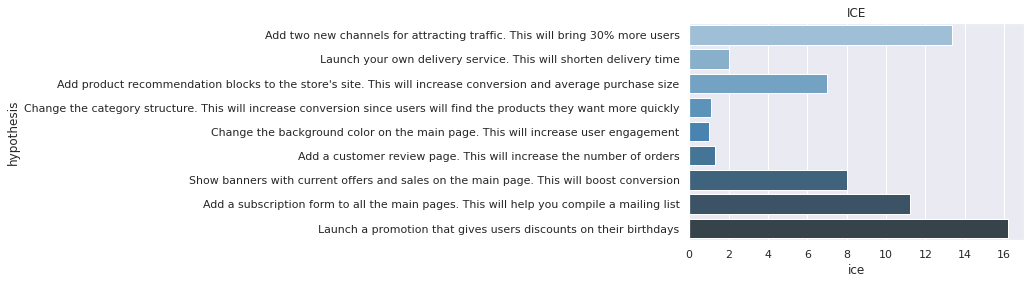

,hypothesis,reach,impact,confidence,effort,ice,priority_ice
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,1
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,9
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,2
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,3
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,7
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,8
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,6
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,5


In [17]:
# add ice and "priority_ice" column to hypotheses and shorting column 
hypotheses["ice"] = (hypotheses["impact"]*hypotheses["confidence"])/ hypotheses["effort"]
hypotheses['priority_ice'] = (
    hypotheses.apply(lambda x: hypotheses[hypotheses['hypothesis'] == x['hypothesis']]
                   .index.values[0],
                     axis=1))
hypotheses[['hypothesis','ice','priority_ice']]
hypotheses['priority_ice'] = 9 - hypotheses['priority_ice']

# plot ice table
sns.barplot(y="hypothesis", x="ice", data=hypotheses.head(9),palette=("Blues_d"))
plt.title('ICE')
plt.show();

hypotheses.sort_values(by="ice", ascending=False)

<br>Based on the `ICE` framework to prioritize hypotheses, our top three is: 

1. &nbsp; "&nbsp;Launch a promotion that gives users discounts on their birthdays&nbsp;"


2. &nbsp;"&nbsp;Add two new channels for attracting traffic. This will bring 30% more users&nbsp;"


3. &nbsp;"&nbsp;Add a subscription form to all the main pages. This will help you compile a mailing list&nbsp;"

<hr id="p2"><h2>Apply the `RICE` framework to prioritize hypotheses</h2><br>Sort them in descending order of priority

<h2>RICE:</h2>

Reach — how many users will be affected by the update you want to introduce

Impact — how strongly this update will affect the users, their experience, and their satisfaction with the product

Confidence — how sure you are that your product will affect them in this way

Effort — how much will it cost to test the hypothesis

In [18]:
# add column "rice"
hypotheses['rice'] = hypotheses.apply(lambda x: x['impact'] * x['confidence'] * x['reach'] / x['effort'], axis=1)

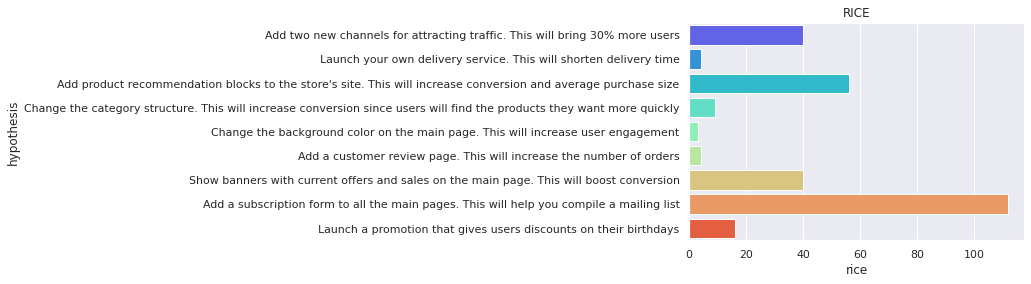

,hypothesis,reach,impact,confidence,effort,ice,priority_ice,rice
0,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,2,112.0
1,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,7,56.0
2,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,9,40.0
3,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,3,40.0
4,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,1,16.2
5,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,6,9.0
6,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,8,4.0
7,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4,4.0
8,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,5,3.0


In [19]:
# plot the Rice table
sns.barplot(y="hypothesis", x="rice", data=hypotheses.head(9),palette=("rainbow"))
plt.title('RICE')
plt.show();

# sorting column "rice"
hypotheses = hypotheses.sort_values(by='rice', ascending = False).reset_index(drop=True)
hypotheses

In [20]:
#add column "priority_rice"
hypotheses['priority_rice'] = (
    hypotheses.apply(lambda x: hypotheses[hypotheses['hypothesis'] == x['hypothesis']].
                     index.values[0],
                     axis=1))
hypotheses[['hypothesis','rice','priority_rice']]
hypotheses['priority_rice'] = 9 - hypotheses['priority_rice']
hypotheses

,hypothesis,reach,impact,confidence,effort,ice,priority_ice,rice,priority_rice
0,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,2,112.0,9
1,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,7,56.0,8
2,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,9,40.0,7
3,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,3,40.0,6
4,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,1,16.2,5
5,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,6,9.0,4
6,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,8,4.0,3
7,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4,4.0,2
8,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,5,3.0,1


<br>Based on the `RICE` framework to prioritize hypotheses, our top three is: 

1. &nbsp;"&nbsp;Add a subscription form to all the main pages. This will help you compile a mailing list&nbsp;"


2. &nbsp;"&nbsp;Add product recommendation blocks to the store's site. This will increase conversion and average purchase size&nbsp;"


3. &nbsp;"&nbsp;Add two new channels for attracting traffic. This will bring 30% more users&nbsp;"

<hr id="p3"><h3>Show how the prioritization of hypotheses changes when you use RICE Vs ICE</h3><br> Provide an explanation for the changes

In [21]:
# add shift column 
hypotheses['shift'] = hypotheses.apply(lambda x: x['priority_rice'] - x['priority_ice'], axis=1)

# function to compere the "ice" & "rice" priority
def neg(val):
    color = 'red' 
    if val >= 0:
        color = 'green'
    return 'color: %s' % color

# adding columns and apply the function
(hypotheses[['hypothesis','priority_rice','priority_ice','shift']].style.applymap(neg,subset=['shift']))  

,hypothesis,priority_rice,priority_ice,shift
0,Add a subscription form to all the main pages. This will help you compile a mailing list,9,2,7
1,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,7,1
2,Add two new channels for attracting traffic. This will bring 30% more users,7,9,-2
3,Show banners with current offers and sales on the main page. This will boost conversion,6,3,3
4,Launch a promotion that gives users discounts on their birthdays,5,1,4
5,Change the category structure. This will increase conversion since users will find the products they want more quickly,4,6,-2
6,Launch your own delivery service. This will shorten delivery time,3,8,-5
7,Add a customer review page. This will increase the number of orders,2,4,-2
8,Change the background color on the main page. This will increase user engagement,1,5,-4


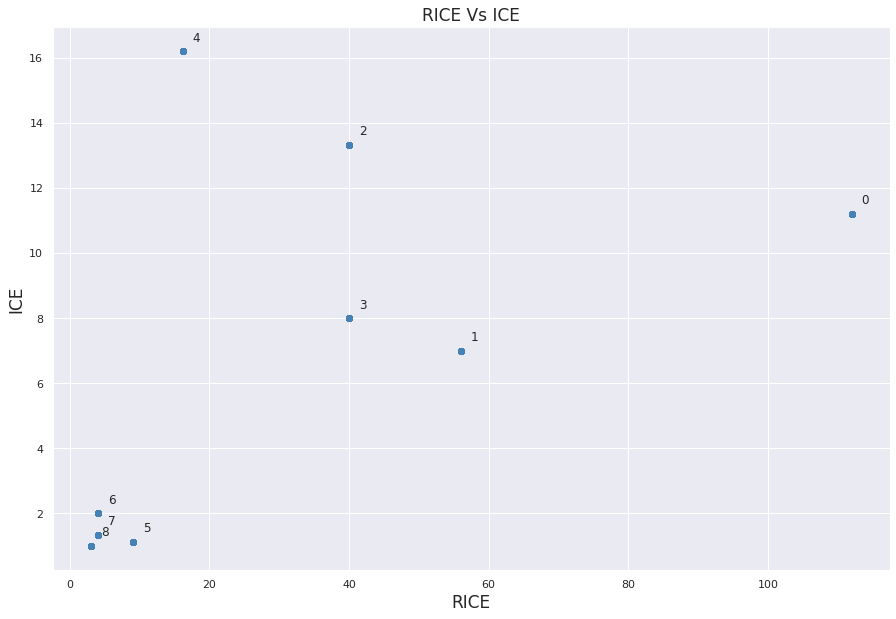

In [22]:
#Plot RICE Vs ICE
x = hypotheses['rice'].values
y = hypotheses['ice'].values
types = hypotheses.index.values
fig, ax = plt.subplots(figsize=(15,10))
ax.scatter(x, y)
ax.set_xlabel('RICE', fontsize=17)
ax.set_ylabel('ICE', fontsize=17)
ax.set_title('RICE Vs ICE', fontsize=17)
for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(10,10), textcoords='offset points')
    plt.scatter(x, y,color='steelblue')
plt.show();

<h2>Conclusion</h2>

<b>ICE = (Impact x Confidence) / Effort</b>

<b>RICE score = (Reach x Impact x Confidence)/ Effort</b>

Our Top 5 ICE promising hypotheses:

 - Launch a promotion that gives users discounts on their birthdays
 
 - Add two new channels for attracting traffic. This will bring 30% more users
 
 - Add a subscription form to all the main pages. This will help you compile a mailing list
 
 - Show banners with current offers and sales on the main page. This will boost conversion
 
 - Add product recommendation blocks to the store's site. This will increase conversion & average purchase size 
 
 
Our Top 5 RICE promising hypotheses: 

   - Add a subscription form to all the main pages. This will help you compile a mailing list
   
   - Add product recommendation blocks to the store's site. This will increase conversion & average purchase size
   
   - Add two new channels for attracting traffic. This will bring 30% more users
   
   - Show banners with current offers and sales on the main page. This will boost conversion
   
   - Launch a promotion that gives users discounts on their birthdays
   
   
We can see that in both calc Top 5 is the same list of hypotheses but in a little bit diffrent order   
   
Our scatter plot, show that there has been a considerable reshuffling of priorities, this can be due the sensitivity of reach parameter whose ranking differs from each other

We assigning a prioritization rating to RICE & ICE, we can see hypotheses have different priorities

In the 'shift' column we can see how many positions the priority changed when we prioritized using the RICE method

The priority has been increased for those hypotheses for potential audience reach was higher

More people innovation affects, more result will be getting

<a href="#top">
    <button>&#8593; Back To index</button>
  </a> 

<hr><h1>Part II "A/B Test Analysis"</h1>

You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv

<hr id="q1"><h2>1.Graph cumulative 'Revenue by group'</h2>

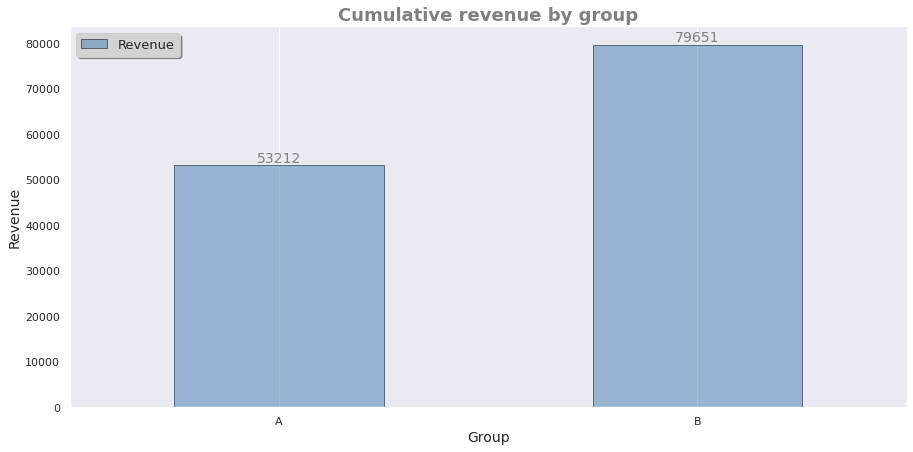

cumulative_revenue 
 
 
 
 revenue 
 
 
 group 
 
 
 
 
 
 A 
 53212.0 
 
 
 B 
 79651.2 
 
 
 orders head 
 
 
 
 transactionid 
 visitorid 
 date 
 revenue 
 group 
 
 
 
 
 0 
 3667963787 
 3312258926 
 2019-08-15 
 30.4 
 B 
 
 
 1 
 2804400009 
 3642806036 
 2019-08-15 
 15.2 
 B 
 
 
 3 
 3797467345 
 1196621759 
 2019-08-15 
 155.1 
 B 
 
 
 4 
 2282983706 
 2322279887 
 2019-08-15 
 40.5 
 B 
 
 
 5 
 182168103 
 935554773 
 2019-08-15 
 35.0 
 B

In [23]:
# avg cumulative revenue by group
cumulative_revenue=orders_new_data.groupby('group').agg({'revenue':'sum'})
ax=cumulative_revenue.plot(kind='bar',figsize=(15,7),alpha=0.5,label='cumulative revenue',
  rot=360,edgecolor = 'black',color='steelblue');
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc="best")
plt.title("Cumulative revenue by group",fontdict={'size':18},weight='bold',color = 'gray');
plt.xlabel("Group",fontdict={'size':14});
plt.ylabel("Revenue",fontdict={'size':14} );
plt.legend(loc="best")
plt.legend(['Revenue'],loc="upper left",prop = {'size' : 13}, shadow = True, facecolor = 'lightgray')
plt.grid(axis='y', color='black', lw = 0.8, alpha=0.3)
for item in ax.patches:
    height = item.get_height()
    ax.annotate('{:.0f}'.format(height),
            xy=(item.get_x() + item.get_width() / 2, height),
            xytext=(0, 0),  
            textcoords="offset points",
            ha='center', va='bottom',size='14',color='gray')
plt.show();
sbs(cumulative_revenue,orders_new_data.head(5),titles=['cumulative_revenue','orders head'])

We can see that Group 'B' 79651.2 bring more profit than group 'A' 53212 

In [24]:
# compering both groups revenue
datesGroups = orders_new_data[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders_new_data[np.logical_and(orders_new_data['date'] <= x['date'], 
                                                                              orders_new_data['group'] == x['group'])].agg \
                                     ({'date' : 'max', 'group' : 'max', 
                                           'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}), 
                                     axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x \
                                                                       ['group'])].agg({'date' : 'max', 'group' : 'max', 
                                                                                            'visits' : 'sum'}), 
                                       axis=1).sort_values(by=['date','group'])
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [25]:
#cumulative revenue by group A
cumulativeDataA.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,2266.6,719
2,2019-08-02,A,42,36,3734.9,1338
4,2019-08-03,A,66,60,5550.1,1845
6,2019-08-04,A,77,71,6225.6,2562
8,2019-08-05,A,99,92,7623.6,3318


In [26]:
#cumulative revenue by group B
cumulativeDataB.head(5)

,date,group,orders,buyers,revenue,visitors
1,2019-08-01,B,17,17,967.2,713
3,2019-08-02,B,40,39,3535.3,1294
5,2019-08-03,B,54,53,4606.9,1803
7,2019-08-04,B,68,66,6138.5,2573
9,2019-08-05,B,89,87,7587.8,3280


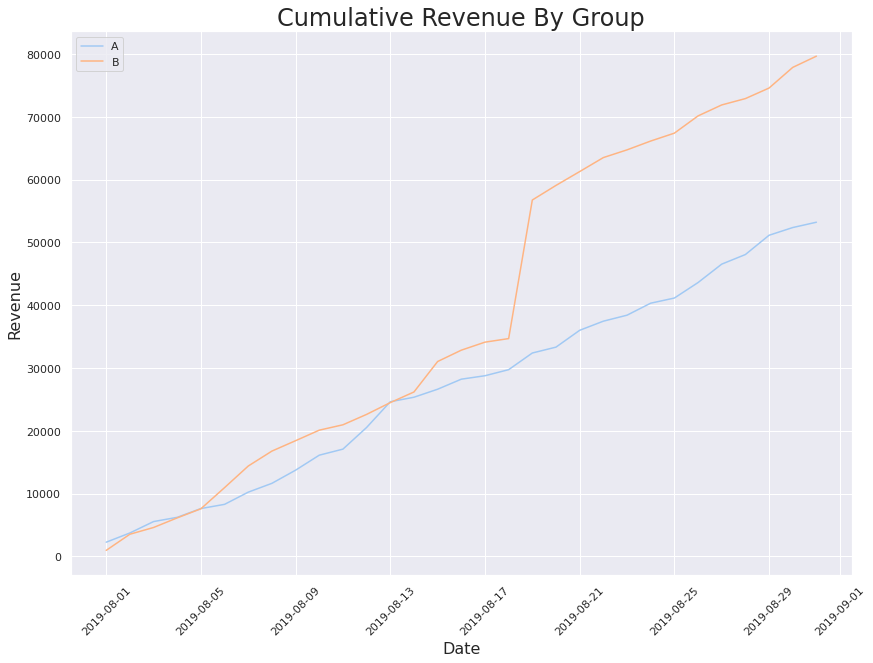

In [27]:
# cumulative revenue by group over time plot
plt.figure(figsize=(14,10))
plt.title('Cumulative Revenue By Group', size=24)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Date', size=16)
plt.ylabel('Revenue', size=16)
plt.xticks(rotation=45)
plt.legend()
plt.show();


- We can see that our revenue is rising steadily throughout the test


- Huge increase revenue in group 'B' towards the end of the test (2019-08-17 - 2019-08-21)


- Spikes in group B revenue may be result of:


  - Rise in the No. of transaction   
    
  - Rise in the No. of visitors
    
  - Expensive orders 
    
let's keep going to our next test to see if groub 'B' keep the same way and find if it's anomaly or not   

<hr id="q2"><h2>2.Graph cumulative average order size by group</h2>

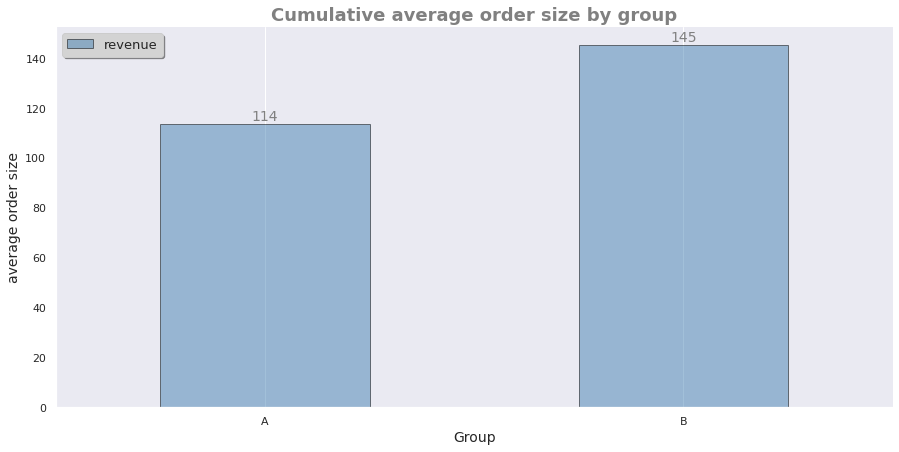

,revenue
group,
A,113.700855
B,145.348905


In [28]:
average_order_size=orders_new_data.groupby('group').agg({'revenue':'mean'})
ax=average_order_size.plot(kind='bar',figsize=(15,7),alpha=0.5,label='cumulative revenue',rot=360
  ,edgecolor = 'black',color='steelblue');
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.legend(loc="best")
plt.title("Cumulative average order size by group",fontdict={'size':18},weight='bold',color = 'gray');
plt.xlabel("Group",fontdict={'size':14});
plt.ylabel("average order size",fontdict={'size':14});
plt.legend(loc="best")
plt.legend(loc="upper left",prop = {'size' : 13}, shadow = True, facecolor = 'lightgray')
plt.grid(axis='y', color='black', lw = 0.8, alpha=0.3)
for item in ax.patches:
    height = item.get_height()
    ax.annotate('{:.0f}'.format(height),
            xy=(item.get_x() + item.get_width() / 2, height),
            xytext=(0, 0),  
            textcoords="offset points",
            ha='center', va='bottom',size='14',color='gray')
plt.show();
average_order_size

In [29]:
#add avg order size column
cumulativeData['avgorder_size'] = cumulativeData['revenue']/cumulativeData['orders']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [30]:
#group A avg size order
cumulativeDataA.head(5)

,date,group,orders,buyers,revenue,visitors,avgorder_size
0,2019-08-01,A,23,19,2266.6,719,98.547826
2,2019-08-02,A,42,36,3734.9,1338,88.926190
4,2019-08-03,A,66,60,5550.1,1845,84.092424
6,2019-08-04,A,77,71,6225.6,2562,80.851948
8,2019-08-05,A,99,92,7623.6,3318,77.006061


In [31]:
#group b avg size order
cumulativeDataB.head(5)

,date,group,orders,buyers,revenue,visitors,avgorder_size
1,2019-08-01,B,17,17,967.2,713,56.894118
3,2019-08-02,B,40,39,3535.3,1294,88.382500
5,2019-08-03,B,54,53,4606.9,1803,85.312963
7,2019-08-04,B,68,66,6138.5,2573,90.272059
9,2019-08-05,B,89,87,7587.8,3280,85.256180


We can see that our average order size is very close between the two groups, but still group 'B' is on top like we see in the previous question

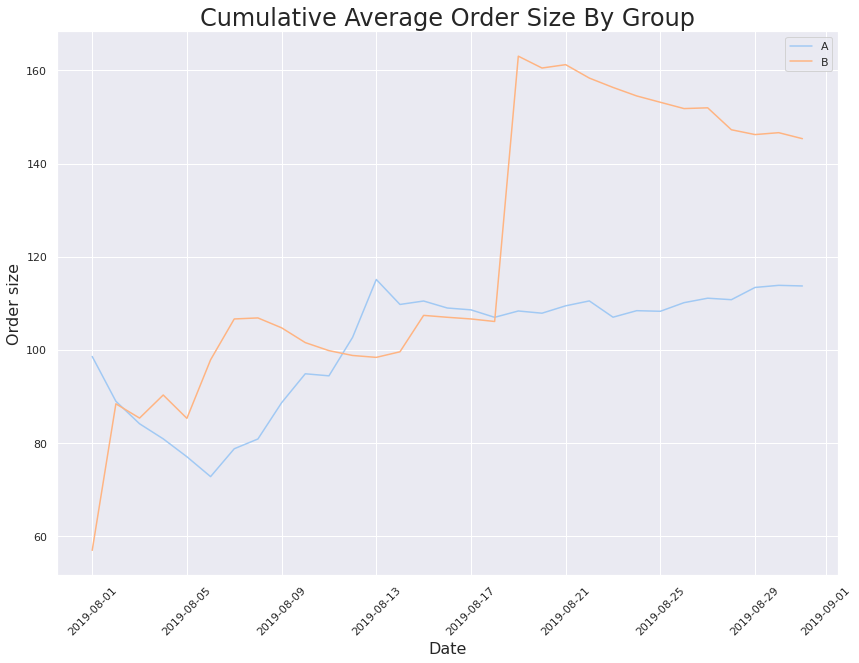

In [32]:
# compering the average in both data groups
plt.figure(figsize=(14,10))
plt.title('Cumulative Average Order Size By Group', size=24)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Date', size=16)
plt.ylabel('Order size', size=16)
plt.xticks(rotation=45)
plt.legend()
plt.show();
print()

- Average order size keeps flunctuating throughout the test


- The surge in group B is the 2019-08-18 may have been due to the presence of large, expensive orders, we need more data on       this group to find the true average purchase size and establish its level


- Group A started with a fall in the average order size but saw a surge at the end of the first half of the test, and becomes     steady from 2019-08-13 till the end of our test


- As we can see, the average purchase price in Group B is higher, but the trend is downtrend and it is not clear from the         available data whether the average order price in Group B will fall below Group A


- Group B keep rising steadily with a huge surge towards the end of the test

<hr id="q3"><h2>3.Graph the Relative difference in cumulative average order size for group B compared with group A</h2><br> Make conclusions and conjectures</h4><br>

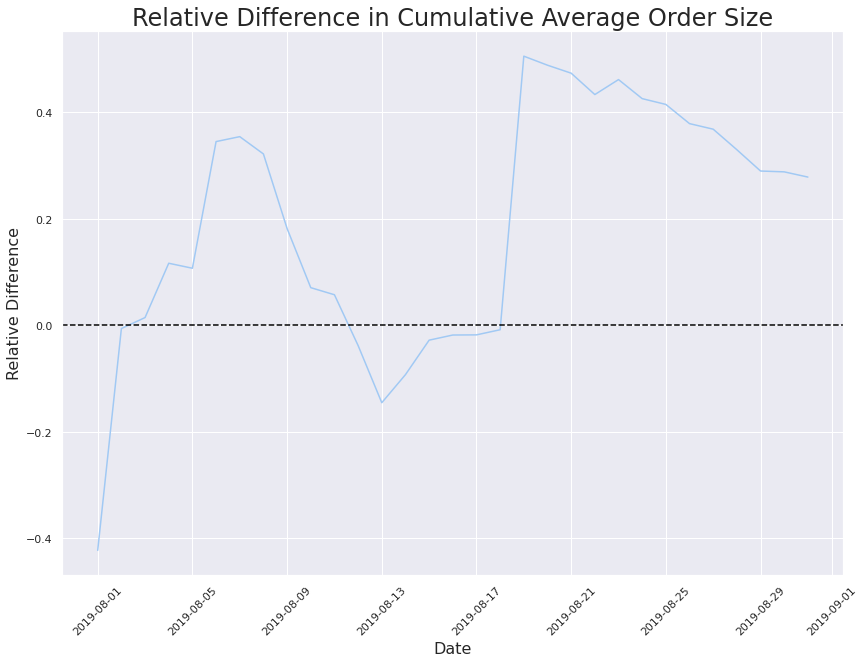

In [33]:
# plot of the relative difference in average order sizes 
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', 
                                                   suffixes=['A', 'B'])
plt.figure(figsize=(14,10))
plt.title('Relative Difference in Cumulative Average Order Size', size=24)
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('Date', size=16)
plt.ylabel('Relative Difference', size=16)
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=45)
plt.show();


- We see big orders and outliers or abnormally of large buying

- The chart is downtrend and we do not have enough data to make an unambiguous conclusion regarding the relative 
  difference between the average order size
  
- Several spikes relative difference  

- Sharp reversals, which means that there are an abnormally large buying in both groups

<hr id="q4"><h2>4.Calculate each group's conversion rate as the ratio of orders to the number of visits for each day</h2><br> Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures<br>

In [34]:
# calculate the conversion_rate
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

In [35]:
# group A conversion
cumulativeDataA.head(5)

,date,group,orders,buyers,revenue,visitors,avgorder_size,conversion
0,2019-08-01,A,23,19,2266.6,719,98.547826,0.031989
2,2019-08-02,A,42,36,3734.9,1338,88.926190,0.031390
4,2019-08-03,A,66,60,5550.1,1845,84.092424,0.035772
6,2019-08-04,A,77,71,6225.6,2562,80.851948,0.030055
8,2019-08-05,A,99,92,7623.6,3318,77.006061,0.029837


In [36]:
# group B conversion
cumulativeDataB.head(5)

,date,group,orders,buyers,revenue,visitors,avgorder_size,conversion
1,2019-08-01,B,17,17,967.2,713,56.894118,0.023843
3,2019-08-02,B,40,39,3535.3,1294,88.382500,0.030912
5,2019-08-03,B,54,53,4606.9,1803,85.312963,0.029950
7,2019-08-04,B,68,66,6138.5,2573,90.272059,0.026428
9,2019-08-05,B,89,87,7587.8,3280,85.256180,0.027134


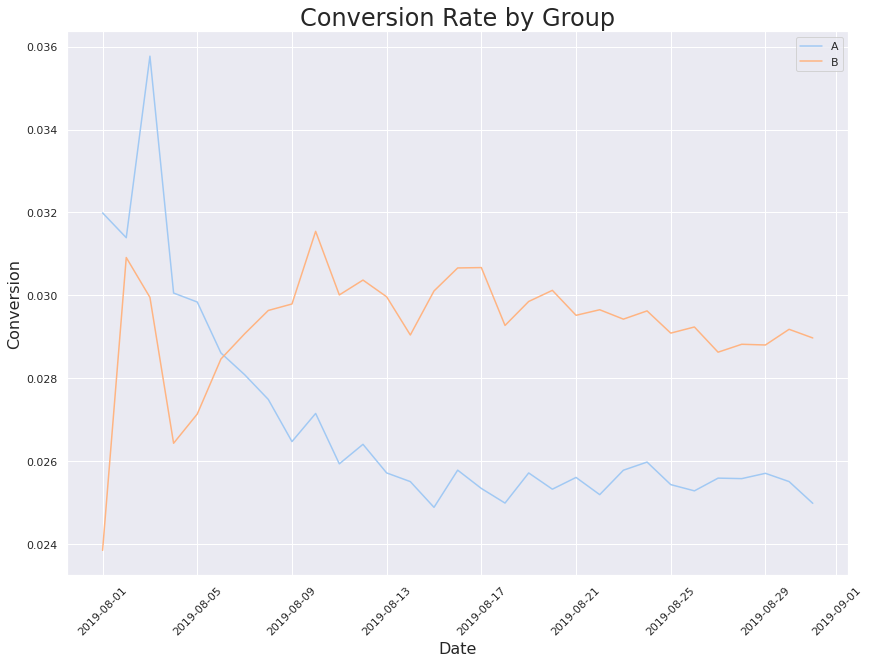

In [37]:
# creating a line plot for the conversion rate
plt.figure(figsize=(14,10));
plt.title('Conversion Rate by Group', size=24);
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A');
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B');
plt.xlabel('Date', size=16)
plt.ylabel('Conversion', size=16);
plt.legend();
plt.xticks(rotation=45);
plt.show();

- In the end of the period, our conversion charts have stabilized

- Our conversion rate for group 'B' rise and fall at the beginning of the test before rising to stay above group 'A' till the end of test

- There are flunctuation in the conversion rate for the groups

<a href="#top">
    <button>&#8593; Back To index</button>
  </a> 

<hr id="q5"><h2>5.Plot a scatter chart of the number of orders per user</h2>

In [38]:
#finding the number of orders per user
ordersByUsers = (orders_new_data.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorid', as_index=False)
    .agg({'transactionid': "nunique"}))
ordersByUsers.columns = ['userid', 'orders']

In [39]:
# calculate number of customers with one order
share_one_order = (
    len(ordersByUsers[ordersByUsers['orders'] == 1])
    /
    len(ordersByUsers)
)
print('{:.2%} of customers make only one order'.format(share_one_order))

96.30% of customers make only one order


In [40]:
#order by users describe
sbs(ordersByUsers.describe(),titles=['ordersByUsers.describe'])

,userid,orders
count,9.730000e+02,973.000000
mean,2.118387e+09,1.044193
std,1.221446e+09,0.238090
min,5.114589e+06,1.000000
25%,1.028756e+09,1.000000
50%,2.138109e+09,1.000000
75%,3.141508e+09,1.000000
max,4.283872e+09,3.000000


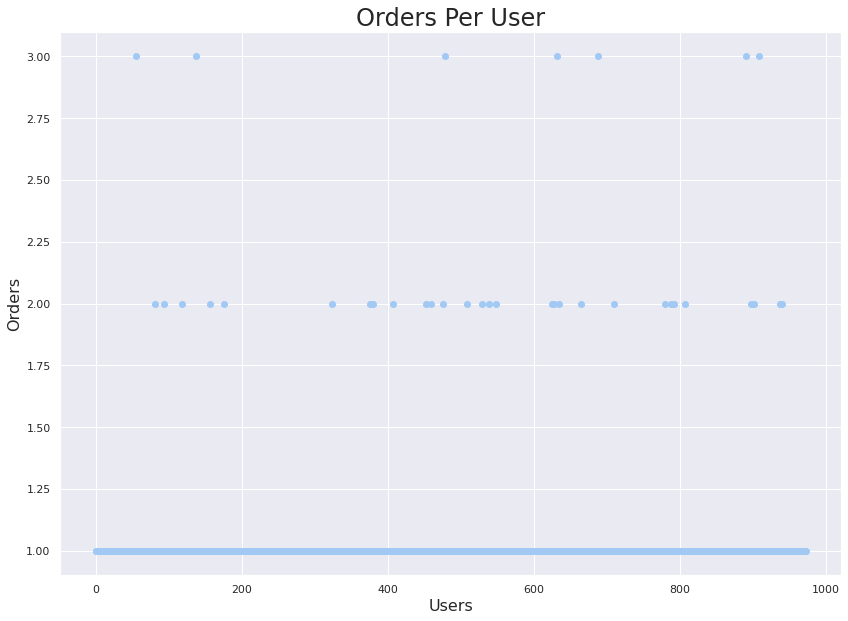

In [41]:
#plotting scatter chart
plt.figure(figsize=(14,10))
plt.title('Orders Per User', size=24)
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.xlabel('Users', size=16)
plt.ylabel('Orders', size=16)
plt.show();

- Users with more than two orders may turn out to be anomalies

- We can see that the majority of customers, 96.3% only 1 order

- There are very few users with more than two orders

<hr id="q6"><h2>6.Calculate the 95th and 99th percentiles for the number of orders per user</h2>

In [42]:
# calculating 95th and 99th percentiles
display(np.percentile(ordersByUsers['orders'], [95,99]))

array([1., 2.])

<h3> Define the point at which a data point becomes an anomaly:</h3>

- 95th 1 order


- 99th 2 or more orders


- So it would be right to put one order per user as the upper limit for No of orders and filter anomalies on that base

<a href="#top">
    <button>&#8593; Back To index</button></a> 

<hr id="q7"><h2>7.Plot a scatter chart of order prices</h2>

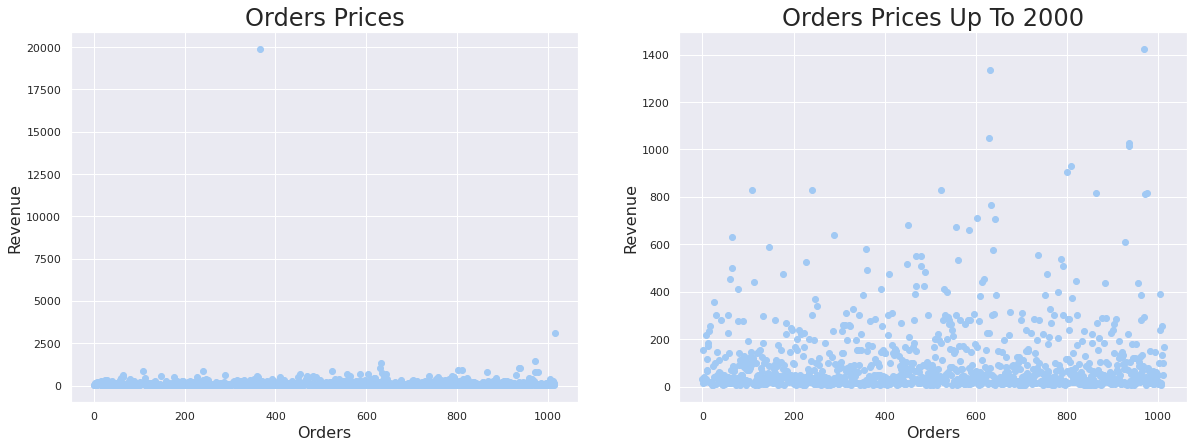

In [43]:
#side by side scatter chart of order prices 
plt.figure(figsize=(20,15))

plt.subplots_adjust(wspace=0.2)
ax1 = plt.subplot(2,2,1)
ax1_values = pd.Series(range(0, len(orders_new_data['revenue'])));
plt.title('Orders Prices', size=24);
plt.scatter(ax1_values, orders_new_data['revenue']);
plt.xlabel('Orders', size=16);
plt.ylabel('Revenue', size=16);

ax2 = plt.subplot(2,2,2)
ax2_values = pd.Series(range(0, len(orders_new_data.query('revenue < 2000')['revenue'])))
plt.title('Orders Prices Up To 2000', size=24)
plt.scatter(ax2_values, orders_new_data.query('revenue < 2000')['revenue'])
plt.xlabel('Orders', size=16)
plt.ylabel('Revenue', size=16)
plt.show();

<h3>Make conclusions and conjectures:</h3>

- From our scatter we can see that most orders are less than 2000 dollers revenue


- Difficult to say anything about the revenue of smaller orders


- Very few orders cost more than 2000 dollers


- There are outliers of about 2000 US Dollars and 20k US Dollar, which definitely looks preety anomalous

<hr id="q8"><h2>8.Calculate the 95th and 99th percentiles of order prices</h2>

In [44]:
# calculating 95th and 99th percentiles
display(np.percentile(orders_new_data['revenue'], [95,99]))

array([414.275, 830.3  ])

<h3>Define the point at which a data point becomes an anomaly:</h3>

- No more than 5% of users placed orders over ~414 dollars


- No more than 1% of users placed orders over ~830 dollars


- Most extreme 1-5% of observed values are filtered out


- It would be right to set 414 dollars per order as the higher limit and to filter anomalies on that base

<hr id="q9"><h2>9.Find the statistical significance of the difference in conversion between the groups using the raw data</h2>

**Hypotheses:**

H0: No statistically significant difference in conversion between the groups

H1: There is statistically significant difference in conversion between the groups

Significance level = 0.05

In [45]:
# creating dataFrame for the number of orders for users in groups

ordersByUsersA = orders_new_data[orders_new_data['group'] == 'A'].groupby('visitorid', 
                                                                          as_index=False).agg({'transactionid':'nunique'})
ordersByUsersA.columns = ['visitorid', 'orders']
ordersByUsersB = orders_new_data[orders_new_data['group'] == 'B'].groupby('visitorid', 
                                                                          as_index=False).agg({'transactionid':'nunique'})
ordersByUsersB.columns = ['visitorid', 'orders']
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index=np.arange(
    visits[visits['group'] == 'A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')], axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index=np.arange(
    visits[visits['group'] == 'B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')], axis=0)

sbs(ordersByUsersA.sample(10),ordersByUsersB.sample(10),titles=['orders By Users A','orders By Users B'])

,visitorid,orders
69,749770631,1
323,3102053760,1
288,2761566146,1
262,2606208134,1
277,2703178540,1
304,2912540959,1
278,2705308997,1
369,3396460792,1
162,1539796403,1
87,888420622,1


In [46]:
# declaring varieble with users who made orders in groups
print('Sample A size:', len(sampleA))
print('Sample B size:', len(sampleB))

Sample A size: 18736
Sample B size: 18916


In [47]:
# Testing hypothesis
significance_level = .05 # significance level

results = st.mannwhitneyu(sampleA, sampleB)

display('p-value: '"{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
display('Relative conversion gain: '"{0:.2f}".format(sampleB.mean() / sampleA.mean() -1))

if (results.pvalue < significance_level):
    display("We reject the null hypothesis: There is statistically significant difference in conversion between the groups")
else:
    display("We can't reject the null hypothesis: No statistically significant difference in conversion between the groups")

'p-value: 0.011'

'Relative conversion gain: 0.16'

'We reject the null hypothesis: There is statistically significant difference in conversion between the groups'

<h3>Make conclusions and conjectures:</h3>

We conduct a test with null hypothesis:


  - H0: No statistically significant difference in conversion between the groups
  

  - H1: There is statistically significant difference in conversion between the groups

    
- We set the significance_level to .05


- We apply the criterion and format the p-value by rounding it to 3 decimal places


- SampleA stores a sample where each element is the number of orders made by a certain user, including 0's


- SampleB stores a sample where each element is the number of orders made by a certain user, including 0's


- We use mannwhitneyu() method because our data contains big (compared to the normal distribution) outliers and algebraic         metrics don't work very well


- The p-value is smaller than .05, So I reject the null hypothesis that there isn't a statistically significant difference in   conversion between the groups


- The relative difference of group B compere to group A

<hr id="q10"><h2>10.Find the statistical significance of the difference in average order size between the groups using the raw data</h2>

**Hypotheses:**

H0: No statistically significant difference in average order size between the groups

H1: There is statistically significant difference in average order size between the groups

Significance level = 0.05

In [48]:
# creating a dataFrames to gather data
orderSizeA = orders_new_data[orders_new_data['group']=='A']['revenue']
orderSizeB = orders_new_data[orders_new_data['group']=='B']['revenue']

# Testing hypothesis
significance_level = .05 # significance level

results = st.mannwhitneyu(orderSizeA, orderSizeB)

display('p-value: {0:.3f}'.format(st.mannwhitneyu(orderSizeA, orderSizeB)[1]))
display('Relative difference: {0:.4%}'.format(orderSizeB.mean()/orderSizeA.mean()-1))

if (results.pvalue < significance_level):
    display("We reject the null hypothesis: There is statistically significant difference in avg order size between the groups")
else:
    display("We can't reject the null hypothesis: No statistically significant difference in avg order size between the groups")

'p-value: 0.862'

'Relative difference: 27.8345%'

"We can't reject the null hypothesis: No statistically significant difference in avg order size between the groups"

<h3>Make conclusions and conjectures:</h3>

We conduct a test with null hypothesis:


- H0: No statistically significant difference in average order size between the groups


- H1: There is statistically significant difference in average order size between the groups
    

- We set the significance_level to .05


- The average order size for group B is bigger than it is for group A 27.8%


- The p-value is greater than 0.05, So I can't reject the null hypothesis that there is no statistically significant             differences between the groups average order sizes


- SampleA stores a sample with the average order size


- SampleB stores a sample with the average order size


- We use mannwhitneyu() method because our data contains big (compared to the normal distribution) outliers and algebraic         metrics don't work very well


- We apply the criterion and format the p-value by rounding it to 3 decimal places

<hr id="q11"><h2>11.Find the statistical significance of the difference in conversion between the groups using the filtered data</h2>

**null hypothesis and alternative hypothesis:**

H0: No statistically significant difference in conversion between the groups filtered data

H1: There is statistically significant difference in conversion between the groups filtered data

 Anomalous users = users who made two or more orders or placed one for more than 414 Dollar

Significance level = 0.05

In [49]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorid'], 
                                 ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorid']], axis=0)

usersWithExpensiveOrders = orders_new_data[orders_new_data['revenue'] > 414]['visitorid']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values()

sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))]['orders'], 
                             pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - 
                                                          len(ordersByUsersA['orders'])), name='orders')], axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))]['orders'], 
                             pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - 
                                                          len(ordersByUsersB['orders'])), name='orders')], axis=0)

print('We have {:} anomalous users in total'.format(len(abnormalUsers)))

We have 86 anomalous users in total


In [50]:
print('Sample A size:', len(sampleAFiltered))
print('Sample B size:', len(sampleBFiltered))

Sample A size: 18697
Sample B size: 18869


In [51]:
# Testing hypothesis
significance_level = .05 # significance level

results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

display("p-value: {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
display("Relative difference: {0:.1%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

if (results.pvalue < significance_level):
    display("We reject the null hypothesis: There is a statistically significant difference in conversion between the groups filtered data")
else:
    display("We can't reject the null hypothesis: No statistically significant difference in conversion between the groups filtered data")

'p-value: 0.016'

'Relative difference: 17.4%'

'We reject the null hypothesis: There is a statistically significant difference in conversion between the groups filtered data'

<h3>Make conclusions and conjectures:</h3>

We conduct a test with null hypothesis:


 - H0: There is a statistically significant difference in conversion between the groups filtered data

    
 - H1: No statistically significant difference in conversion between the groups filtered data
 
 
 


- We had 86 anomalous users in total

    
- The relative difference of group B is 17.4%


- We set the significance_level = .05


- The p-value is smaller than 0.05, So I reject the null hypothesis that there isn't a statistically significant difference in   conversion between the groups


- We apply the criterion and format the p-value by rounding it to 3 decimal places


- SampleA stores a sample where each element is the number of orders made by a certain user from filterd data


- SampleB stores a sample where each element is the number of orders made by a certain user from filterd data


- We use mannwhitneyu() method


- The ratio of the mean values practically did not change. It turns out that "anomalous" users had practically no effect on the   value of this metric

- Anomalous users = users who made two or more orders or placed one for more than 414 Dollar

<hr id="q12"><h2>12.Find the statistical significance of the difference in average order size between the groups using the filtered data</h2>

**Hypotheses:**

H0: No statistically significant difference in avg order size between the groups

H1: There is statistically significant difference in avg order size between the groups

Significance level = 0.05

In [52]:
revenue_A_filtered = (
    orders_new_data[(np.logical_not(orders_new_data['visitorid'].
                                   isin(abnormalUsers)))                
                   & (orders_new_data['group'] == 'A')])['revenue']
revenue_B_filtered = (
   orders_new_data[(np.logical_not(orders_new_data['visitorid'].
                                   isin(abnormalUsers)))                
                   & (orders_new_data['group'] == 'B')])['revenue']

In [53]:
# Testing hypothesis
significance_level  = .05 # significant level

results = st.mannwhitneyu(revenue_A_filtered, revenue_B_filtered)

display('p-value: {0:.3f}'.format(st.mannwhitneyu(revenue_A_filtered, revenue_B_filtered)[1]))
display('Relative difference: {0:.1%}'.format(revenue_B_filtered.mean()/revenue_A_filtered.mean()-1))

if (results.pvalue < significance_level):
    display("We reject the null hypothesis: There is statistically significant difference in avg order size between the groups")
else:
    display("We can't reject the null hypothesis: No statistically significant difference in avg order size between the groups")

'p-value: 0.771'

'Relative difference: -3.3%'

"We can't reject the null hypothesis: No statistically significant difference in avg order size between the groups"

<h3>Make conclusions and conjectures:</h3>

We conduct a test with null hypothesis:

- H0: No statistically significant difference in avg order size between the groups

    
- H1: There is statistically significant difference in avg order size between the groups 
   

- We apply the criterion and format the p-value by rounding it to 3 decimal places

    
- We set the significance_level = .05


- We use mannwhitneyu() method


- SampleA stores a sample with the average order size


- SampleB stores a sample with the average order size


- The p-value is greater than .05, So I can't reject the null hypothesis that there is no statistically significant differences between the groups average order sizes


- The relative difference of group B is -3.3%


- It turns out that "anomalous" users had effect on the value of this metric based on the relative difference of group B

<hr id="q13"><h2>13.Make a decision based on the test results</h2><br> 

**What we found:**

* The conversion rate of group 'B' is greater than 'group A'


* We see that there isn't significant difference between our groups in term of average order sizes  

Following this, we can say that the hypothesis tested will improve the conversion rate, however, it will not affect the average purchase size

**We can conclude that:**

* Stop the test, result is very clear, group B is the leader and after the anomalies were removed, it was found that there was a statistically significant difference in conversion between the groups 


* Even though there isn't significant difference between groups 'average order size',there is statistically significant difference in term of conversion rates 


* Test was success

<hr id="general_conclusion"><h2>General conclusion</h2><br>

<hr>
<b><u>INTRODUCTION</u></b>

You are an analyst in a large online store and together with the company's marketing department you have decided on a step that includes a number of hypotheses tests that should help to give a better picture how to bring the store into it's maximize profits

As part of your role in the force you were asked to prepare a list of hypothesis tests and rate their importance including performing an A / B test that you had to analyze its results

<hr>
<b><u>Our datasets:</u></b><br>
<br>
<b style="font-size: 17px;">The `hypotheses` dataset:</b>

<b style="font-size: 14px;">`Dataseat rows`: 9</b>

`Hypotheses` -  brief descriptions of the hypotheses

`Reach` - user reach, on a scale of one to ten

`Impact`- impact on users, on a scale of one to ten

`Confidence` - confidence in the hypothesis, on a scale of one to ten

`Effort` - the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test
<br>
<br>
<b style="font-size: 17px;">The `orders` dataset:</b>

<b style="font-size: 14px;">`Dataseat rows`: 1197</b>

`transactionId` -  order identifier

`visitorId` -  identifier of the user who placed the order

`date`-  of the order

`revenue` - from the order

`group` - A/B test group
<br>
<br>
<b style="font-size: 17px;">The `visits` dataset:</b>

<b style="font-size: 14px;">`Dataseat rows`: 62</b>

`date`-  of the order

`revenue` - from the order

`group` - A/B test group

`visits` - the number of visits on the date specified in the A/B test group specified
<br>

<b><u>Prepare data:</u></b> 

We didn't find any Missing values or 0's or Duplicated or Nan in our datasets exapct for 58 same users in both groups in order to keep a clean check if users are unique to both groups, we decided to remove them as well in order to name any incorrect data as a result of our findings.

We Convert our issue columns from **Object** to **datetime** 

<b style="font-size: 15px;">`visits`:</b> `date`- 'object' we turn it into 'datetime64'

<b style="font-size: 15px;">`orders`:</b> `date`- we turn it into 'datetime64'

and uniform the case letters to lowercase: `hypotheses`: `Hypothesis`, `Reach` , `Impact` , `Confidence`, `Effort`<br>

`orders`: `transactionId`, `visitorId` <br><br>

<b><u>III - Analyze the data</u></b>

Analysis of our data is made up of two parts first prioritization of hypotheses using ICE and RICE where we diagnosed list of 9 hypotheses. 

We found that Top 5 hypotheses are the same in both checking but in slightly different order , this can be due to sensitivity of the 'reach' parameter.

in our secand part of which we did A/B test , and after compere , ploting , check hypotheses p-value etc' , We found that our group 'B' is the leader of this test , they bring more profit than Group 'A' and even in our Avg size order when the result is very close still 'B' is leader also there is few big or expansive orders in this group which can be outlier but still this not change it that we can stop our test we see clear diffrent between them.

We also found that more than 96% of our users avg  order was only one and in price of 414.3 usd and there is very few users with 3 orders.


So our overall conclusion , we can stop the testing , it was success & also  result positive consideration 

<hr><h2>Overall conclusion</h2><br>

In our project 7 we prioritize the hypotheses using ICE & RICE method. presented and interpreted the cumulative revenue by group and compared and interpreted the cumulative mean order by group and cumulative conversion.

Compared the conversion rate of the two groups and the number of orders per user, found That is a significant difference in data between the groups, according to our raw data.

We set the percentages to 95 and 99 and at the same time the anomalies, made four hypotheses with raw data and with the filtered one.

After testing, we drew conclusions for each hypothesis and examined whether they exceeded our significant level and thus make a significant difference between the groups' averages.

After removing the anomalies, it turned out that there is a statistically significant difference between groups! and that group 'B' is the leader when it's come to conversion which mean more revenue to our online store.

<a href="#top">
    <button>&#8593; Top Page</button>
  </a> 